#### Import Required Libraries

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F 
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

#### Load Data

In [2]:

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) #transform & normalize data
train_dataset = datasets.CIFAR10(root='dataset/', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.CIFAR10(root='dataset/', train=False, transform=transforms.ToTensor(), download=True)
train_loader = DataLoader(train_dataset, batch_size=100, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=500, shuffle=False)


Extracting dataset/cifar-10-python.tar.gz to dataset/
Files already downloaded and verified


#### Set Classes

In [3]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck') #set classes

#### Show sample

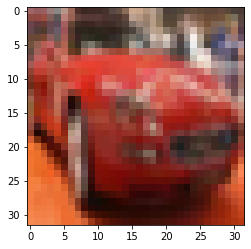

In [4]:
image, label = train_dataset[5]
plt.imshow(image.permute(1, 2, 0))

#### Fully Connected NN

In [5]:
class FNN(nn.Module):
  def __init__(self, input_size=32*32*3, output_size=10):
        super().__init__()
        self.fc1 = nn.Linear(input_size, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, output_size)

  def forward(self, X):
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)

        return F.log_softmax(X, dim=1)

In [6]:
torch.manual_seed(80)
model = FNN()
model

FNN(
  (fc1): Linear(in_features=3072, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

####  Loss and Optimizer

In [7]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

#### Train Model

In [8]:
epochs = 100
#track progress
train_losses = []
test_losses = []
train_correct = []
test_correct  = []

for i in range(epochs): 
   
    training_corr = 0
    testing_corr = 0
    batch_corr = 0
    

    for batch_iter, (X_train, y_train) in enumerate(train_loader): 
      batch_iter +=1

      y_pred = model(X_train.view(100, -1))
      loss = criterion(y_pred, y_train)
      
      predicted = torch.max(y_pred.data, 1)[1]
      batch_corr = (predicted == y_train).sum()
      training_corr += batch_corr
      
     #backward probagation 
      optimizer.zero_grad() #clear gradients
      loss.backward()
      optimizer.step() #optim step parameter update

      if batch_iter % 500 == 0:
        
        accuracy = training_corr.item()*100 / (100*batch_iter) #calculate accurracy
        print( f'epoch:{i}  loss: {loss.item()} accuracy:{accuracy} ') #print while training
    train_losses.append(loss)
    train_correct.append(training_corr)

#start running over test data
    with torch.no_grad():
      
      for batch_iter, (X_test, y_test) in enumerate(test_loader):
        
        y_val = model(X_test.view(500, -1))
        
        predicted = torch.max(y_val.data, 1)[1]
        testing_corr += (predicted == y_test).sum()
     
    loss = criterion(y_val,y_test)
    test_losses.append(loss)
    test_correct.append(testing_corr)

epoch:0  loss: 2.2788197994232178 accuracy:13.16 
epoch:1  loss: 2.2667338848114014 accuracy:13.356 
epoch:2  loss: 2.233870506286621 accuracy:15.2 
epoch:3  loss: 2.235597610473633 accuracy:17.138 
epoch:4  loss: 2.1977126598358154 accuracy:20.292 
epoch:5  loss: 2.162982225418091 accuracy:22.678 
epoch:6  loss: 2.1286163330078125 accuracy:24.848 
epoch:7  loss: 2.0406248569488525 accuracy:26.47 
epoch:8  loss: 2.0906991958618164 accuracy:27.712 
epoch:9  loss: 2.040131092071533 accuracy:28.67 
epoch:10  loss: 1.992926001548767 accuracy:29.622 
epoch:11  loss: 2.022733211517334 accuracy:29.778 
epoch:12  loss: 1.9821243286132812 accuracy:30.374 
epoch:13  loss: 1.985038161277771 accuracy:30.746 
epoch:14  loss: 2.0025837421417236 accuracy:31.028 
epoch:15  loss: 1.8317980766296387 accuracy:31.288 
epoch:16  loss: 1.9970746040344238 accuracy:31.642 
epoch:17  loss: 1.9019417762756348 accuracy:31.822 
epoch:18  loss: 1.846266508102417 accuracy:32.174 
epoch:19  loss: 1.8290703296661377 

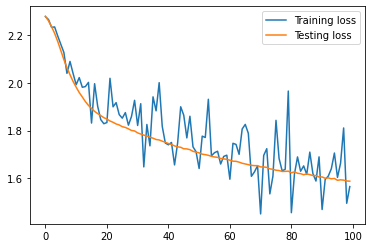

In [9]:
plt.plot(train_losses, label= "Training loss")
plt.plot(test_losses, label= "Testing loss")
plt.legend()